In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

C:\Users\User\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("income.csv")
data.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


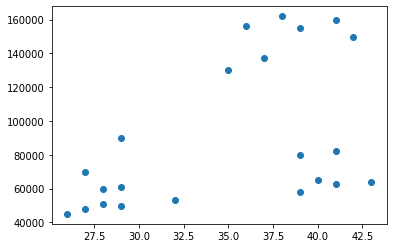

In [3]:
plt.scatter(data["Age"], data["Income"])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
data.columns

Index(['Name', 'Age', 'Income'], dtype='object')

In [8]:
y_predicted = km.fit_predict(data[['Age', 'Income']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [20]:
data["Cluster"] = y_predicted
data.head()

,Name,Age,Income,Cluter,Cluster
0,Rob,27,70000,1,1
1,Michael,29,90000,1,1
2,Mohan,29,61000,2,2
3,Ismail,28,60000,2,2
4,Kory,42,150000,0,0


In [21]:
data1 = data[data["Cluster"]==0]
data2 = data[data.Cluster==1]
data3 = data[data.Cluster==2]
data3
#plt.scatter(data)

,Name,Age,Income,Cluter,Cluster
2,Mohan,29,61000,2,2
3,Ismail,28,60000,2,2
11,Tom,26,45000,2,2
12,Arnold,27,48000,2,2
13,Jared,28,51000,2,2
14,Stark,29,49500,2,2
15,Ranbir,32,53000,2,2
16,Dipika,40,65000,2,2
17,Priyanka,41,63000,2,2
18,Nick,43,64000,2,2


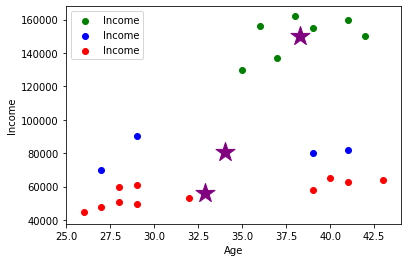

In [40]:
data1 = data[data["Cluster"]==0]
data2 = data[data.Cluster==1]
data3 = data[data.Cluster==2]

plt.scatter(data1["Age"], data1["Income"], color= 'green')
plt.scatter(data2.Age, data2.Income, color= 'blue')
plt.scatter(data3["Age"], data3["Income"], color= 'red')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="*", s = 400, color= "purple")

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(["Income", "Income", "Income"])

In [36]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [41]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[["Age", "Income"]])
    sse.append(km.inertia_)

In [42]:
sse

[39748148458.545456,
 3318233941.161905,
 1577046058.8831167,
 814746044.2545455,
 296500418.0952381,
 231967084.4619048,
 184166947.4166667,
 119633613.78333332,
 92633459.7]

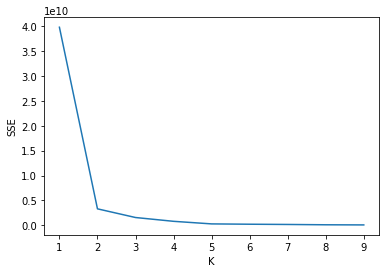

In [45]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_rng,sse)